# <b><p style="color:##FF8000;">Evaluacion Deep Learning </p><b>
    
## Alumno: Cristian Fernando Rodriguez
## Prof. Fernando Velasco
## UCM - Master en Big data & Analytics

## <b>Evaluacion de la asignatura</b>

Uso de un modelo preentrenado para su afinado en un dataset de clasificación de
imágenes. 

## Criterios de evaluación (0-10) pueden resumirse en los siguientes puntos:

1. <u> Análisis exploratorio de los datos (1.5 puntos)</u>: Consiste en un breve vistazo a los datos proporcionados.

2. <u> Metodología (2 puntos)</u>: Se valorará si el alumno comprende los conceptos de los tipos de dataset y es capaz de generar un modelo de acuerdo con la metodología propia de Machine Learning.

3. <u>Explicabilidad y reproductibilidad (1.5 puntos)</u>: Se valorará si el alumno entiende los conceptos y es capaz de explicarlos. También si los experimentos pueden reproducirse.

4. <u>Construcción y entrenamiento del modelo (5 puntos)</u>: Se evaluarán las técnicas empleadas y el nivel de acierto en el dataset elegido.

#### Pasos (BORRAR)
<u>teddy/Grizzly/Black dataset: Balanceo, cuántos hay de cada uno.</u>

<u>Entrenamiento:</u>
Model architecture:
VGG16
Dense layers

No sé:
Image generator from a directory

-Pueba del modelo
Test on random images

### Variable Objetivo: Se usara la metodología de Transfer Learning para la clasificación de imágenes entre tres categorías de osos: <i> "Teddy","Grizzly","Black"</i>
   
Los alumnos emplearán una red preentrenada que afinarán con este dataset, de manera similar a la vista en clase para otros dataset.


In [1]:
#LIBRERIAS 
import pandas as pd
import numpy as np
import os
import keras
import tensorflow as tf

# Paquetes de las librerias importadas. Para la construcción del modelo:
from tensorflow.keras.preprocessing import image #lectura de las imagenes y visualización
from keras.layers import Dense,GlobalAveragePooling2D #Añade la capa densa (512 units and relu activated) y la global pooling layer.
from keras.applications import MobileNet, VGG16 #Añade el modelo preentrenado VGG16 y MobileNet
from keras.models import Model #Importamos el modelo

#Paquetes de las librerias importadas: Para el entrenamiento del modelo, vamos a pasarle todas las imagenes. 
#En este caso, procesaremos bajo el VGG16.
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input as preprocess_mobilenet
from keras.applications.vgg16 import preprocess_input as preprocess_vgg16

#Paquetes de las librerias importadas: Para compilar el modelo. Elegimos el metodo 'Adam' y el categorical Xentropy.
#Se decide incluir las metricas de 'accuracy' o eficacia del modelo. 
from keras.optimizers import Adam
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

#Paquetes de las librerias importadas: Para redimensionar la imagen a 224,224 tal y como hemos establecido en 
#nuestro modelo.
from numpy import expand_dims
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')
tf.keras.backend.clear_session()  # For easy reset of notebook state.

### 1. <b> Análisis exploratorio de los datos </b>: 

Las imagenes que se analizan están contenidas en el siguiente dataset que importamos: osos.tar.
El dataset se compone de 3 clases de imágenes de osos tipo "Teddy", "Grizlly", "Blacks". A continuación, vemos su ejemplo y el número de imágenes en cada clase.

Numero de imagenes clase 'Teddy': 80


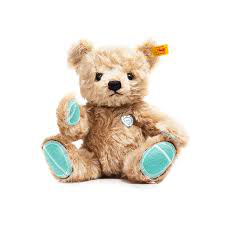

In [2]:
ej_teddys=image.load_img('/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Materias/Modulo 14. Deep Learning/online_deep_learning_intro/Práctica/dataset/osos/teddys/00000005.jpg')
DIRt = '/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Materias/Modulo 14. Deep Learning/online_deep_learning_intro/Práctica/dataset/osos/teddys'
print("Numero de imagenes clase 'Teddy':",len([name for name in os.listdir(DIRt) if os.path.isfile(os.path.join(DIRt, name))]))
ej_teddys

Numero de imagenes clase 'Grizzly': 80


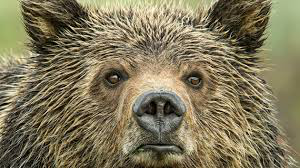

In [13]:
ej_grizzlies=image.load_img('/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Materias/Modulo 14. Deep Learning/online_deep_learning_intro/Práctica/dataset/osos/grizzly/00000018.jpg')
DIRg = '/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Materias/Modulo 14. Deep Learning/online_deep_learning_intro/Práctica/dataset/osos/grizzly'
print("Numero de imagenes clase 'Grizzly':",len([name for name in os.listdir(DIRg) if os.path.isfile(os.path.join(DIRg, name))]))
ej_grizzlies

Numero de imagenes clase 'Black': 80


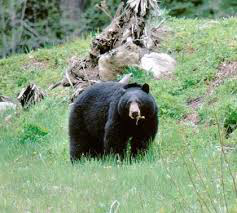

In [17]:
ej_blacks=image.load_img('/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Materias/Modulo 14. Deep Learning/online_deep_learning_intro/Práctica/dataset/osos/black/00000004.jpg')
DIRb = '/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Materias/Modulo 14. Deep Learning/online_deep_learning_intro/Práctica/dataset/osos/black'
print("Numero de imagenes clase 'Black':",len([name for name in os.listdir(DIRb) if os.path.isfile(os.path.join(DIRg, name))]))
ej_blacks

A vista de lo anterior, el dataset está bien balanceado para el entrenamiento se compone de 240 imagenes con una proporción de 1/3 para cada clase (80 imagenes cada una).

### 2. <b> Arquitectura del Modelo</b>

In [33]:
#base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last layer.
base_model=VGG16(weights='imagenet',include_top=False) #imports the vgg16 model and discards the last layer.
#No esta incluyendo la capa superior y ya la incluiermos nosotros. 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

In [34]:
## CREATE THE MODEL

In [35]:
from keras.models import Model
model=Model(inputs=base_model.input,outputs=preds)
model.summary()
#Tenemos muchisimos parametros pero no se entrenaran todos. Hay parametros por capa. Algunas no los tienen
#El modelo tiene 22 capas a partir de las 19 del base.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

### 3. <u>Explicabilidad y reproductibilidad:</u>

In [36]:
#Comentar resultados del modelo.

In [47]:
#Numero de capas del modelo base
len (base_model.layers)

19

In [48]:
#Numero de capas en el modelo final
len(model.layers)

22

In [37]:
for layer in model.layers[:19]:
    layer.trainable=False
    #En la red secuencial ve los inputs va llegando capa a capa y luego backpropagation para luego ir hacia adelante
    #Aqui le estamos diciendo que solo actualice los 19 capas. 
    #Asi no se reentrena todo para que no se aprenda los features. Aqui puedo poner qe vaya a 16 o otroas capas
for layer in model.layers[19:]:
    layer.trainable=True

### 4. <u>Construcción y entrenamiento del modelo
</u>

Create the generator and specify it will use the vgg preprocessing input function. No other data augmentation so far. Add the flow_from directory function to include where the data will be taken from. 
Use target size of 224 square.

In [39]:
# train_datagen=ImageDataGenerator(preprocessing_function=preprocess_mobilenet) #included in our dependencies
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_vgg16) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Documentacion Clases/Modulo 14. Deep Learning/Práctica/dataset/osos', # this is where you specify the path to the main data folder
                                                  target_size=(224,224),
                                                  # default parameters
                                                  color_mode='rgb',
                                                  batch_size=2,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 240 images belonging to 3 classes.


In [41]:
#Compilación del modelo con 5 epochs. 
model.compile(optimizer='Adam',loss='categorical_crossentropy',
              metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    epochs=5)

Epoch 1/5
120/120 [==============================] - 278s 2s/step - loss: 0.8636 - accuracy: 0.8833
Epoch 2/5
120/120 [==============================] - 258s 2s/step - loss: 0.5487 - accuracy: 0.9417
Epoch 3/5
120/120 [==============================] - 237s 2s/step - loss: 0.2706 - accuracy: 0.9875
Epoch 4/5
120/120 [==============================] - 245s 2s/step - loss: 0.1761 - accuracy: 0.9750
Epoch 5/5
120/120 [==============================] - 247s 2s/step - loss: 0.0831 - accuracy: 0.9875


In [49]:
#Compilación del modelo con 6 epochs A partir del modelo anterior.
#¿Aumenta el accuracy del modelo?
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    epochs=6)

Epoch 1/6
120/120 [==============================] - 247s 2s/step - loss: 0.1209 - accuracy: 0.9875
Epoch 2/6
120/120 [==============================] - 242s 2s/step - loss: 0.1557 - accuracy: 0.9917
Epoch 3/6
120/120 [==============================] - 242s 2s/step - loss: 1.0028 - accuracy: 0.9250
Epoch 4/6
120/120 [==============================] - 646s 5s/step - loss: 0.5869 - accuracy: 0.9667
Epoch 5/6
120/120 [==============================] - 248s 2s/step - loss: 0.2478 - accuracy: 0.9875
Epoch 6/6
120/120 [==============================] - 274s 2s/step - loss: 0.0812 - accuracy: 0.9958


In [50]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    epochs=8)

Epoch 1/8
120/120 [==============================] - 239s 2s/step - loss: 0.0954 - accuracy: 0.9875
Epoch 2/8
120/120 [==============================] - 240s 2s/step - loss: 0.3792 - accuracy: 0.9875
Epoch 3/8
120/120 [==============================] - 1382s 12s/step - loss: 1.2227e-06 - accuracy: 1.0000
Epoch 4/8
120/120 [==============================] - 261s 2s/step - loss: 1.1284e-06 - accuracy: 1.0000
Epoch 5/8
120/120 [==============================] - 261s 2s/step - loss: 1.0459e-06 - accuracy: 1.0000
Epoch 6/8
120/120 [==============================] - 253s 2s/step - loss: 9.7592e-07 - accuracy: 1.0000
Epoch 7/8
120/120 [==============================] - 246s 2s/step - loss: 9.0639e-07 - accuracy: 1.0000
Epoch 8/8
120/120 [==============================] - 245s 2s/step - loss: 8.4680e-07 - accuracy: 1.0000


In [3]:
class_dict = {v:k for k, v in train_generator.class_indices.items()}

def predict_image(path):
    img = image.load_img(path)
    img = img.resize((224, 224))
    data = expand_dims(image.img_to_array(img), 0)
    data = preprocess_vgg16(data)
    preds = model.predict(data)
    pred = np.argmax(preds)
    pred = class_dict[pred]
    print(pred)
    return img
predict_image('/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Documentacion Clases/Modulo 14. Deep Learning/Práctica/dataset/pruebas_img/00002.jpg')

NameError: name 'train_generator' is not defined

grizzly


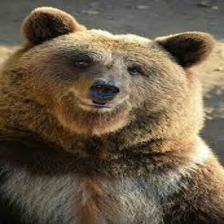

In [52]:
predict_image('/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Documentacion Clases/Modulo 14. Deep Learning/Práctica/dataset/pruebas_img/00013.jpg')

black


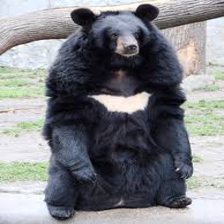

In [46]:
predict_image('/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Documentacion Clases/Modulo 14. Deep Learning/Práctica/dataset/pruebas_img/00008.jpg')

In [ ]:
#Vamos a predecir sobre el conjunto de imagenes almacenadas
path  = '/Users/Cristian/OneDrive - Universidad Complutense de Madrid (UCM)/MASTER BIG DATA/Documentacion Clases/Modulo 14. Deep Learning/Práctica/dataset/pruebas_img'
for (dirpath, dirnames, filenames) in os.walk(path):
    for filename in filenames:
        if filename.endswith('.jpg'): 
            new_path = os.sep.join([dirpath, filename])
            predict_image(new_path)